<a href="https://colab.research.google.com/github/Cardona-JE/Estructura-Datos/blob/main/Proyecto/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


El programa utiliza diversos modelos de regresión para predecir las ventas globales de videojuegos en función del género y el año de lanzamiento. Comienza por cargar y filtrar los datos, codificar las etiquetas, y dividirlos en conjuntos de entrenamiento y prueba. Luego, entrena modelos de regresión lineal, árbol de decisión, regresión ridge, Random Forest y XGBoost. Cada modelo captura patrones y relaciones específicas en los datos. Finalmente, evalúa y compara el rendimiento de cada modelo mediante el cálculo del Error Cuadrático Medio (MSE) y visualiza sus relaciones jerárquicas en un grafo, proporcionando una visión comparativa de su eficacia para prever las ventas globales de videojuegos.

In [102]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Elimina un "error" que aparecia, que no afectaba para nada el funcionamiento del programa

**Modelo de Regresion lineal**

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Lee el archivo CSV
df = pd.read_csv('/content/Ventas_videojuegos.csv')  # Asegúrate de reemplazar 'tu_archivo.csv' con el nombre real de tu archivo

# Filtra las columnas necesarias
df = df[['Genre', 'Year_of_Release', 'Global_Sales']]

# Manejo de valores nulos
df.dropna(inplace=True)

# Codificación de etiquetas para la columna 'Genre'
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

# Divide los datos en conjuntos de entrenamiento y prueba
X = df[['Genre', 'Year_of_Release']]
y = df['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse_linear_regression = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error(linear_regression): {mse_linear_regression}')

# Hacer predicciones para un año específico, por ejemplo, 2023 y el género 'Platform'
year_to_predict = 2023
genre_to_predict = 'Platform'
encoded_genre = label_encoder.transform([genre_to_predict])[0]

sales_prediction = model.predict([[encoded_genre, year_to_predict]])*10
print(f'Predicción de ventas globales para el género {genre_to_predict} en {year_to_predict}: {sales_prediction[0]} millones de unidades')


Mean Squared Error(linear_regression): 4.224413029497195
Predicción de ventas globales para el género Platform en 2023: 1.391896251040876 millones de unidades


**Modelo de arbol de desicion**

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Entrenamiento del modelo de árbol de decisión
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse_decision_tree = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (decision_tree): {mse_decision_tree}')

# Hacer predicciones para un año específico, por ejemplo, 2023 y el género 'Platform'
year_to_predict = 2023
genre_to_predict = 'Platform'
encoded_genre = label_encoder.transform([genre_to_predict])[0]

sales_prediction = model.predict([[encoded_genre, year_to_predict]])*10
print(f'Predicción de ventas globales para el género {genre_to_predict} en {year_to_predict}: {sales_prediction[0]} millones de unidades')

Mean Squared Error (decision_tree): 4.329698049298989
Predicción de ventas globales para el género Platform en 2023: 2.1538461538461537 millones de unidades


**Modelo Ridge**

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Entrenamiento del modelo de regresión ridge
model = Ridge()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse_ridge = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Ridge): {mse_ridge}')

# Hacer predicciones para un año específico, por ejemplo, 2023 y el género 'Platform'
year_to_predict = 2023
genre_to_predict = 'Platform'
encoded_genre = label_encoder.transform([genre_to_predict])[0]

sales_prediction = model.predict([[encoded_genre, year_to_predict]])*10
print(f'Predicción de ventas globales para el género {genre_to_predict} en {year_to_predict}: {sales_prediction[0]} millones de unidades')

Mean Squared Error (Ridge): 4.224412969051665
Predicción de ventas globales para el género Platform en 2023: 1.3919047742516 millones de unidades


**Random Forest**


In [106]:
from sklearn.ensemble import RandomForestRegressor

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = random_forest_model.predict(X_test)

# Evaluación del rendimiento del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

# Hacer predicciones para un año específico y género
sales_prediction_rf = random_forest_model.predict([[encoded_genre, year_to_predict]])*10
print(f'Predicción de ventas globales para el género {genre_to_predict} en {year_to_predict} (Random Forest): {sales_prediction_rf[0]} millones de unidades')


Mean Squared Error (Random Forest): 4.301497659621158
Predicción de ventas globales para el género Platform en 2023 (Random Forest): 2.116589300366816 millones de unidades


**XGB Regressor**

In [107]:
from xgboost import XGBRegressor

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo Gradient Boosting (XGBoost)
xgb_model = XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluación del rendimiento del modelo
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error (XGBoost): {mse_xgb}')

# Hacer predicciones para un año específico y género
sales_prediction_xgb = xgb_model.predict([[encoded_genre, year_to_predict]])*10
print(f'Predicción de ventas globales para el género {genre_to_predict} en {year_to_predict} (XGBoost): {sales_prediction_xgb[0]} millones de unidades')


Mean Squared Error (XGBoost): 4.316280753108709
Predicción de ventas globales para el género Platform en 2023 (XGBoost): 0.668180525302887 millones de unidades


In [108]:
models = {
    'Linear Regression': mse_linear_regression,
    'Decision Tree': mse_decision_tree,
    'Ridge Regression': mse_ridge,
    'Random Forest': mse_rf,
    'XGBoost': mse_xgb
}
sorted_models = sorted(models.items(), key=lambda x: x[1])


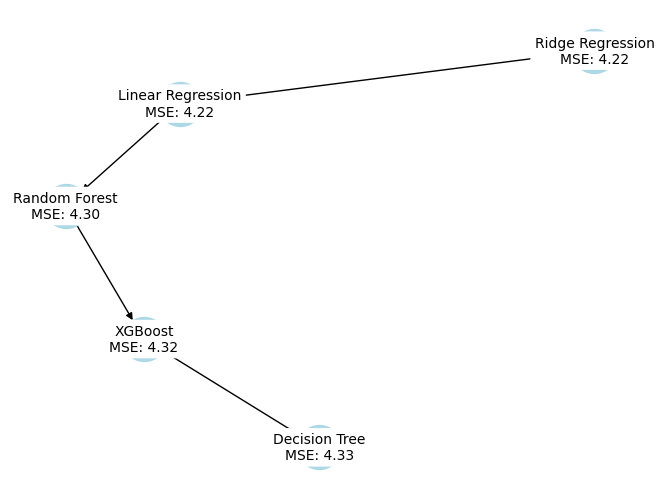

In [110]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido (árbol binario)
G = nx.DiGraph()

# Agregar nodos al grafo
for model, mse in sorted_models:
    G.add_node(model, mse=mse)

# Agregar aristas al grafo (conectar nodos según el orden de eficiencia)
for i in range(len(sorted_models) - 1):
    G.add_edge(sorted_models[i][0], sorted_models[i + 1][0])

# Dibujar el grafo con etiquetas
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, font_weight='bold', node_size=1000, node_color='lightblue', font_size=8)

# Añadir etiquetas de MSE a los nodos
labels = nx.get_node_attributes(G, 'mse')
for node, (x, y) in pos.items():
    plt.text(x, y, f"{node}\nMSE: {labels[node]:.2f}", ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

# Añadir etiquetas de MSE a las aristas
edge_labels = nx.get_edge_attributes(G, 'mse')
for edge, mse in edge_labels.items():
    x, y = (pos[edge[0]][0] + pos[edge[1]][0]) / 2, (pos[edge[0]][1] + pos[edge[1]][1]) / 2
    plt.text(x, y, f"MSE: {mse:.2f}", ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

# Mostrar el gráfico
plt.show()
